In [1]:
%pylab inline
import pandas as pd
import numpy as np
import plotly.plotly as py
import plotly.graph_objs as go
import seaborn as sns
import re
import time
from sklearn.cluster import KMeans



Populating the interactive namespace from numpy and matplotlib


There are two files. One file for the data and another json file for the categories in the data

In [2]:
#Get the Data
youtube = pd.read_csv('USvideos.csv')
#Youtube is the data


In [3]:
#Get the list of categories from a json file 
uscategory = pd.read_json('Us_category_id.json')

categories = {int(cat['id']):cat['snippet']['title'] \
              for cat in uscategory['items']}
print(categories)

{1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports', 18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs', 23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education', 28: 'Science & Technology', 29: 'Nonprofits & Activism', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics', 34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror', 40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'}


# Data Exploring

In [200]:
#Check if any column has null value(Just Description)
youtube.isnull().any() 
#datashape - (24951,16)
youtube.shape
#DatanDim
youtube.ndim
#ColumnType
youtube.dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
dtype: object

In [201]:
#Boolean count
youtube[youtube['comments_disabled'] !=False].count() # 433 out of 24951
youtube[youtube['ratings_disabled'] !=False].count() # 152 out of 24951
youtube[youtube['video_error_or_removed'] !=False].count() # 4 out of 24951

video_id                  4
trending_date             4
title                     4
channel_title             4
category_id               4
publish_time              4
tags                      4
views                     4
likes                     4
dislikes                  4
comment_count             4
thumbnail_link            4
comments_disabled         4
ratings_disabled          4
video_error_or_removed    4
description               2
dtype: int64

In [202]:
#Area describe
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24951 entries, 0 to 24950
Data columns (total 16 columns):
video_id                  24951 non-null object
trending_date             24951 non-null object
title                     24951 non-null object
channel_title             24951 non-null object
category_id               24951 non-null int64
publish_time              24951 non-null object
tags                      24951 non-null object
views                     24951 non-null int64
likes                     24951 non-null int64
dislikes                  24951 non-null int64
comment_count             24951 non-null int64
thumbnail_link            24951 non-null object
comments_disabled         24951 non-null bool
ratings_disabled          24951 non-null bool
video_error_or_removed    24951 non-null bool
description               24507 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 2.5+ MB


In [4]:
#drop some way too complex columns
youtube = youtube.drop('description',axis = 1)
youtube= youtube.drop('thumbnail_link',axis = 1)

In [5]:
youtube.head()


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,False,False,False
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,False,False,False
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,False,False,False
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,False,False,False


In [205]:
#Check the data for one video
youtube[youtube['video_id'] == '2kyS6SvSYSE']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,False,False,False
217,2kyS6SvSYSE,17.15.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2188590,88099,7150,24225,False,False,False
448,2kyS6SvSYSE,17.16.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2325233,91111,7543,21450,False,False,False
689,2kyS6SvSYSE,17.17.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2400741,92831,7687,21714,False,False,False
924,2kyS6SvSYSE,17.18.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2468267,94303,7802,21866,False,False,False
1159,2kyS6SvSYSE,17.19.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2524854,95587,7892,22038,False,False,False
1383,2kyS6SvSYSE,17.20.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,2564903,96321,7972,22149,False,False,False


# Data Visualization  

After explore, I decided to visualize the videos to have a better understanding of the trend.
First I changed the trending data column into date
Then I visualize the first fideo with its views and trending date

In [206]:
#Change trending date into a date format 
#youtube['trending_date'] = pd.to_datetime(youtube['trending_date'],\
#                                          format = '%y.%d.%m').dt.date


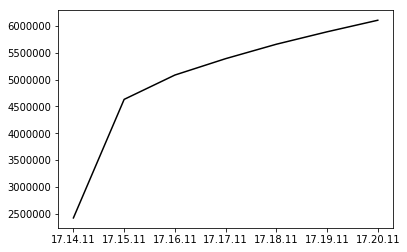

In [5]:
#Testing visualization for first video
sample = youtube[youtube['video_id'] == '1ZAPwfrtAFY']
plot(sample['trending_date'],sample['views'],'k',label = 'a')

([<matplotlib.axis.XTick at 0x1a232a48d0>,
 <a list of 7 Text xticklabel objects>)

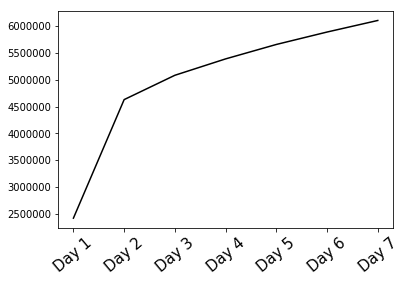

In [208]:
#test visualization for second video
picture = plot(sample['trending_date'],sample['views'],'k')
xticks([0,1,2,3,4,5,6],['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'],rotation=40,fontsize=15)




Then I visualized all the videos into one graph. X axis is the date since it's posted and y axis is the video view for each day.

KeyboardInterrupt: 

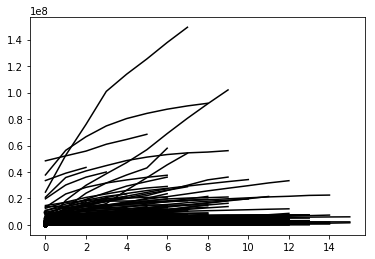

In [9]:
#Visualization for every video
ids = np.unique(youtube['video_id'])

for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date =range(len(sample['trending_date']))
    if len(sample['trending_date'])>1:
        plot(date,sample['views'],'k')
    else:
        plot(date,sample['views'],'.k')
#Insights: date length is different
   

In [210]:
#One data seems to be outlier, check which video is it
np.max(youtube['views'])
testmax = youtube[youtube['views']==np.max(youtube['views'])]
testmax
#outlier is youtube 2017 rewind

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
6181,FlsCjmMhFmw,17.14.12,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,2017-12-06T17:58:51.000Z,"Rewind|""Rewind 2017""|""youtube rewind 2017""|""#Y...",149376127,3093544,1643059,810698,False,False,False


After the trend of all video has been visualized, I realized that there are many missing data for each video. So I want to see how many videos with differene period of time

In [10]:
#Check how many different time period 
ids = np.unique(youtube['video_id'])
testperiod = {}
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date = len(sample['trending_date'])
    if date not in testperiod:
        testperiod[date] = 1
    else:
        testperiod[date] +=1
print(testperiod)

{1: 637, 4: 488, 3: 506, 2: 464, 8: 291, 5: 620, 11: 82, 6: 723, 7: 609, 9: 187, 12: 80, 13: 59, 10: 83, 14: 38, 16: 3, 15: 11}


# Data Clustering


After visualization, I decided to fill in the missing data with daily average views.

In [7]:
#Find out the average for each date
ids = np.unique(youtube['video_id'])
DateAvg = [None] * 15
testdata = []
for i in range(15):
    testdata.append([])
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date = len(sample['trending_date'])
    for d in range(date):
        testdata[d-1].append(sample.iloc[d][8])
for i in range(len(DateAvg)):
    DateAvg[i]= np.mean(testdata[i])
    
'''DateAvg = [35613.39255419416, 41516.31455026455, 
46645.19059254734, 53294.67229002154, 60555.00923361034, 
73603.851004851, 78571.02038369305, 79783.87661141805, 
86902.18258426966, 78850.4542124542, 89226.75392670157, 
112575.39639639639, 79868.69230769231, 128007.85714285714, 
26391.095823095824]'''            


'DateAvg = [35613.39255419416, 41516.31455026455, \n46645.19059254734, 53294.67229002154, 60555.00923361034, \n73603.851004851, 78571.02038369305, 79783.87661141805, \n86902.18258426966, 78850.4542124542, 89226.75392670157, \n112575.39639639639, 79868.69230769231, 128007.85714285714, \n26391.095823095824]'

([<matplotlib.axis.YTick at 0x1a23566748>,
 <a list of 6 Text yticklabel objects>)

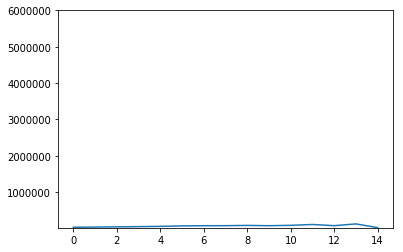

In [324]:
#Plot the Avg with all the graph
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date =range(len(sample['trending_date']))
    if len(sample['trending_date'])>1:
        plot(date,sample['views'],'k')
    else:
        plot(date,sample['views'],'.k')

plot(DateAvg)
yticks([1000000,2000000,3000000,4000000,5000000,6000000])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



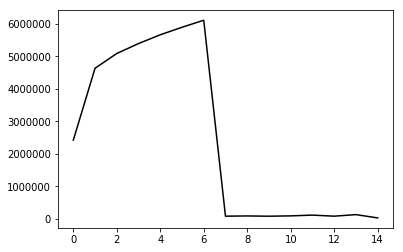

In [328]:
#Create dataset with only ids, dates and views
#Test Fill for first video
test = [[],[],[]]
sample = youtube[youtube['video_id'] == '1ZAPwfrtAFY']
sample.reset_index(drop= True)
dateindex = range(len(sample.index))
sample['trending_date'] = dateindex

usefulcol= ['video_id','trending_date','views']
for i in range(15):
    for u in range(3):
        if i < len(sample.index):
            test[u].append(sample.iloc[i][usefulcol[u]])
        else:
            if u == 0:
                test[u].append(sample.iloc[1][usefulcol[0]])
            if u == 1:
                test[u].append(i)
            if u == 2:
                test[u].append(int(round(DateAvg[i])))
plot(test[1],test[2],'k')


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



AttributeError: Unknown property font

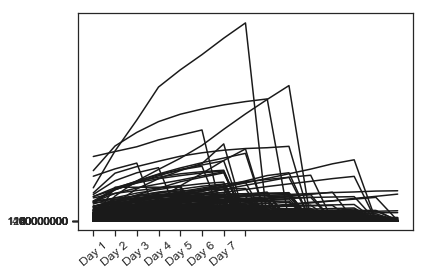

In [334]:
#Fill in the avg data with all the data and plot 
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    sample.reset_index(drop= True)
    dateindex = range(len(sample.index))
    sample['trending_date'] = dateindex
    test = [[],[],[]]
    usefulcol= ['video_id','trending_date','views']
    for i in range(15):
        for u in range(3):
            if i < len(sample.index):
                test[u].append(sample.iloc[i][usefulcol[u]])
            else:
                if u == 0:
                    test[u].append(idnumber)
                if u == 1:
                    test[u].append(i)
                if u == 2:
                    test[u].append(int(round(DateAvg[i])))
    plot(test[1],test[2],'k')
xticks([0,1,2,3,4,5,6,7],['Day 1','Day 2','Day 3','Day 4','Day 5','Day 6','Day 7'],rotation=40,fontsize=12)
yticks([0,1,2,3,4,5,6,7],['10000000','20000000','40000000','60000000','80000000','100000000','1200000000','1400000000'],font = 12)
ylabel('Views',fontsize=16)
    
    
    
    

After the visualization, I extracted only the view column to cluster 

In [8]:
#Create dataset for kmeans
ids = np.unique(youtube['video_id'])
mydata = []
for i in range(len(ids)):
    mydata.append([])

for idnumber in range(len(ids)):
    sample = youtube[youtube['video_id'] == ids[idnumber]]
    sample.reset_index(drop= True)
    dateindex = range(len(sample.index))
    sample['trending_date'] = dateindex
    for i in range(15):
        if i < len(sample.index):
            mydata[idnumber].append(sample.iloc[i][7])
        else:
            mydata[idnumber].append(int(round(DateAvg[i])))


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [20]:
len(mydata[0])

15

 ...]

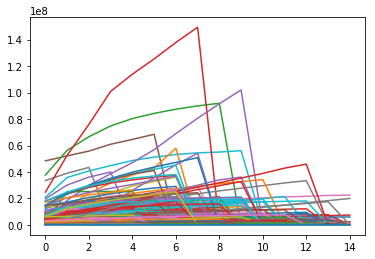

In [22]:
plot(transpose(mydata))

In [9]:
#Cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances


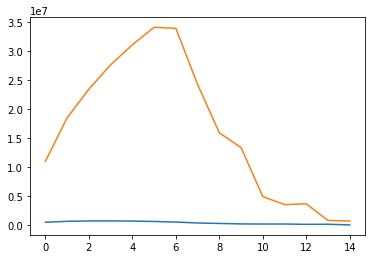

In [9]:
#Test cluster with 2 centroids
kmeans = KMeans(n_clusters=2, random_state=0).fit(mydata)
centroids2 = kmeans.cluster_centers_
plot(transpose(centroids2))


Check the silhoutte score for different number of centeoird

In [11]:
klist = []
for k in range(2,40):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydata)
    labels = kmeans.labels_
    klist.append(metrics.silhouette_score(mydata, labels, metric='euclidean'))

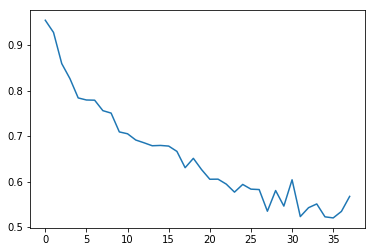

In [12]:
plot(klist)

In [13]:
for k in range(41,60):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydata)
    labels = kmeans.labels_
    klist.append(metrics.silhouette_score(mydata, labels, metric='euclidean'))

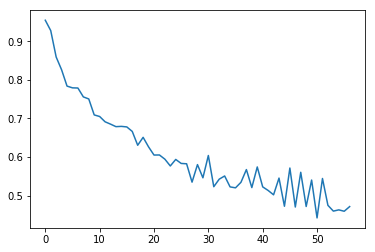

In [14]:
plot(klist)

I also tried to fill in the data with maximum dialy views and see if there will be other cluster methods

In [15]:
#Let's fill the data with max
DateMax = [None] * 15
testdata = []
for i in range(15):
    testdata.append([])
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date = len(sample['trending_date'])
    for d in range(date):
        testdata[d-1].append(sample.iloc[d][8])
for i in range(len(DateMax)):
    DateMax[i]= np.max(testdata[i])

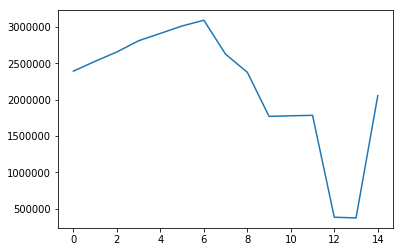

In [18]:
plot(DateMax)

In [20]:
mydatamax = []
for i in range(len(ids)):
    mydatamax.append([])

for idnumber in range(len(ids)):
    sample = youtube[youtube['video_id'] == ids[idnumber]]
    sample.reset_index(drop= True)
    dateindex = range(len(sample.index))
    sample['trending_date'] = dateindex
    for i in range(15):
        if i < len(sample.index):
            mydatamax[idnumber].append(sample.iloc[i][7])
        else:
            mydatamax[idnumber].append(int(round(DateMax[i])))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



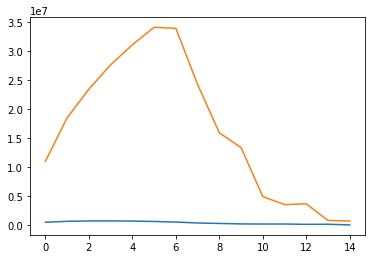

In [21]:
kmeansmax = KMeans(n_clusters=2, random_state=0).fit(mydata)
centroidsmax2 = kmeansmax.cluster_centers_
plot(transpose(centroidsmax2))

In [22]:
klistmax = []
for k in range(2,40):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydatamax)
    labels = kmeans.labels_
    klistmax.append(metrics.silhouette_score(mydatamax, labels, metric='euclidean'))

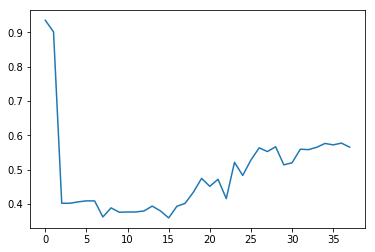

In [23]:
plot(klistmax)

In [25]:
for k in range(41,60):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydatamax)
    labels = kmeans.labels_
    klistmax.append(metrics.silhouette_score(mydatamax, labels, metric='euclidean'))

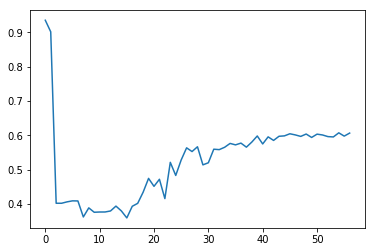

In [27]:
plot(klistmax)

The silhoutte score for data filled with max has no implication
So I also tried fill in the data with daily minimum views.

In [28]:
#Let's try min
DateMin = [None] * 15
testdata = []
for i in range(15):
    testdata.append([])
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    date = len(sample['trending_date'])
    for d in range(date):
        testdata[d-1].append(sample.iloc[d][8])
for i in range(len(DateMax)):
    DateMin[i]= np.min(testdata[i])

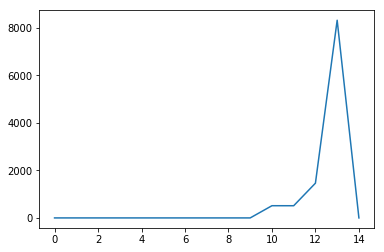

In [29]:
plot(DateMin)

In [30]:
mydatamin = []
for i in range(len(ids)):
    mydatamin.append([])

for idnumber in range(len(ids)):
    sample = youtube[youtube['video_id'] == ids[idnumber]]
    sample.reset_index(drop= True)
    dateindex = range(len(sample.index))
    sample['trending_date'] = dateindex
    for i in range(15):
        if i < len(sample.index):
            mydatamin[idnumber].append(sample.iloc[i][7])
        else:
            mydatamin[idnumber].append(int(round(DateMin[i])))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



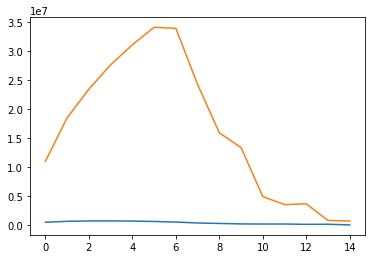

In [31]:
kmeansmin = KMeans(n_clusters=2, random_state=0).fit(mydatamin)
centroidsmin2 = kmeansmax.cluster_centers_
plot(transpose(centroidsmin2))

In [32]:
klistmin = []
for k in range(2,40):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydatamin)
    labels = kmeans.labels_
    klistmin.append(metrics.silhouette_score(mydatamax, labels, metric='euclidean'))

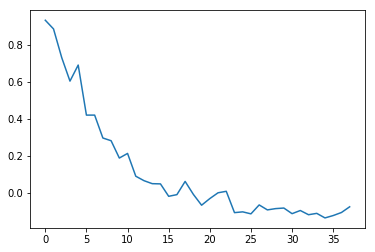

In [33]:
plot(klistmin)

In [34]:
for k in range(41,60):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mydatamin)
    labels = kmeans.labels_
    klistmin.append(metrics.silhouette_score(mydatamax, labels, metric='euclidean'))

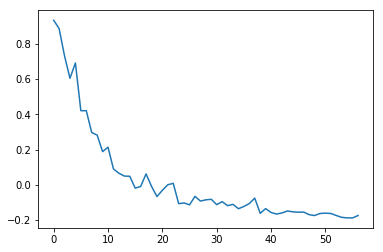

In [35]:
plot(klistmin)

Overall, the silhoutte score shows taht Cluster 2 and Cluster 5 are reasonable solutions and average daily view is a better choice for the missing data.

# Data Analyze

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

In [84]:
#Cluster videos into 2 groups with average 

kmeans = KMeans(n_clusters=2, random_state=0).fit(mydata)
labels = kmeans.labels_
print(len(labels[labels== 0]))
print(len(labels[labels== 1]))



4848
33


In [287]:
#Plot categories and tags with different cluster

# Create data for plotting
categorydata = []
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    categorydata.append(categories[sample.iloc[0]['category_id']])
tagdata=[]
for idnumber in ids:
    sample = youtube[youtube['video_id'] == idnumber]
    tag = sample.iloc[0]['tags']
    tag = tag.lower()
    tag = tag.replace('\"','')
    tag = tag.replace('[','')
    tag = tag.replace(']','')
    tag = tag.split('|')
    tagdata.append(tag)


I created another dataset with just video id, its category, labels and tags

In [289]:
# Category distribution 
plotdata = pd.DataFrame({"id":ids,"CategoryID":categorydata,"Label":labels,"Tags":tagdata})
plotdata.head()


,CategoryID,Label,Tags,id
0,Entertainment,0,"[megan mullally, megan, mullally, will and gra...",-0NYY8cqdiQ
1,People & Blogs,0,"[youtube quiz, youtuber quiz, truth or dare, e...",-1yT-K3c6YI
2,Education,0,"[chess, saint louis, club]",-2RVw2_QyxQ
3,News & Politics,0,"[latest news, happening now, cnn, luis elizond...",-2b4qSoMnKE
4,Sports,0,"[nba, highlights, basketball, plays, amazing, ...",-2wRFv-mScQ


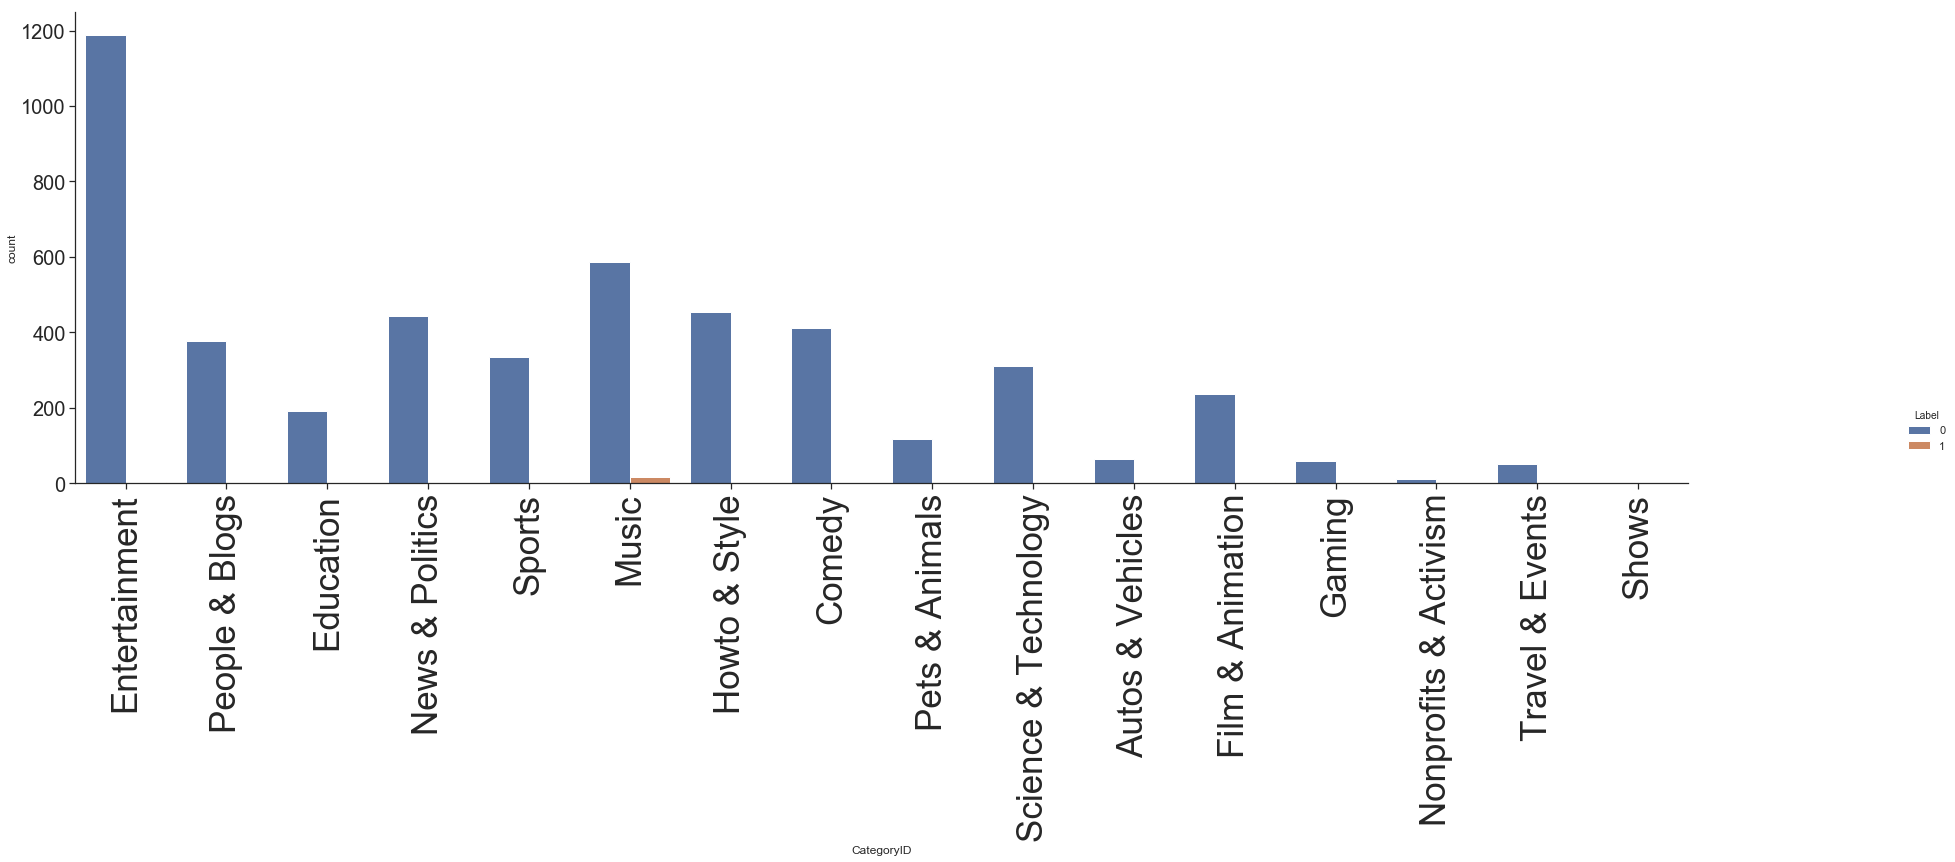

In [346]:
#Plot of all data category
_ = sns.catplot(x='CategoryID', kind="count",hue='Label',data=plotdata)
_.fig.set_size_inches(30,8)
_.set_xticklabels(size = 35,rotation =90)
_.set_yticklabels(size = 20)
#All music with great trend is music videos

In [326]:
# Create dataset with only label 1 
plotdata = pd.DataFrame({"id":ids,"CategoryID":categorydata,"Label":labels,'tag': tagdata})
label1data = plotdata[plotdata['Label'] == 1]

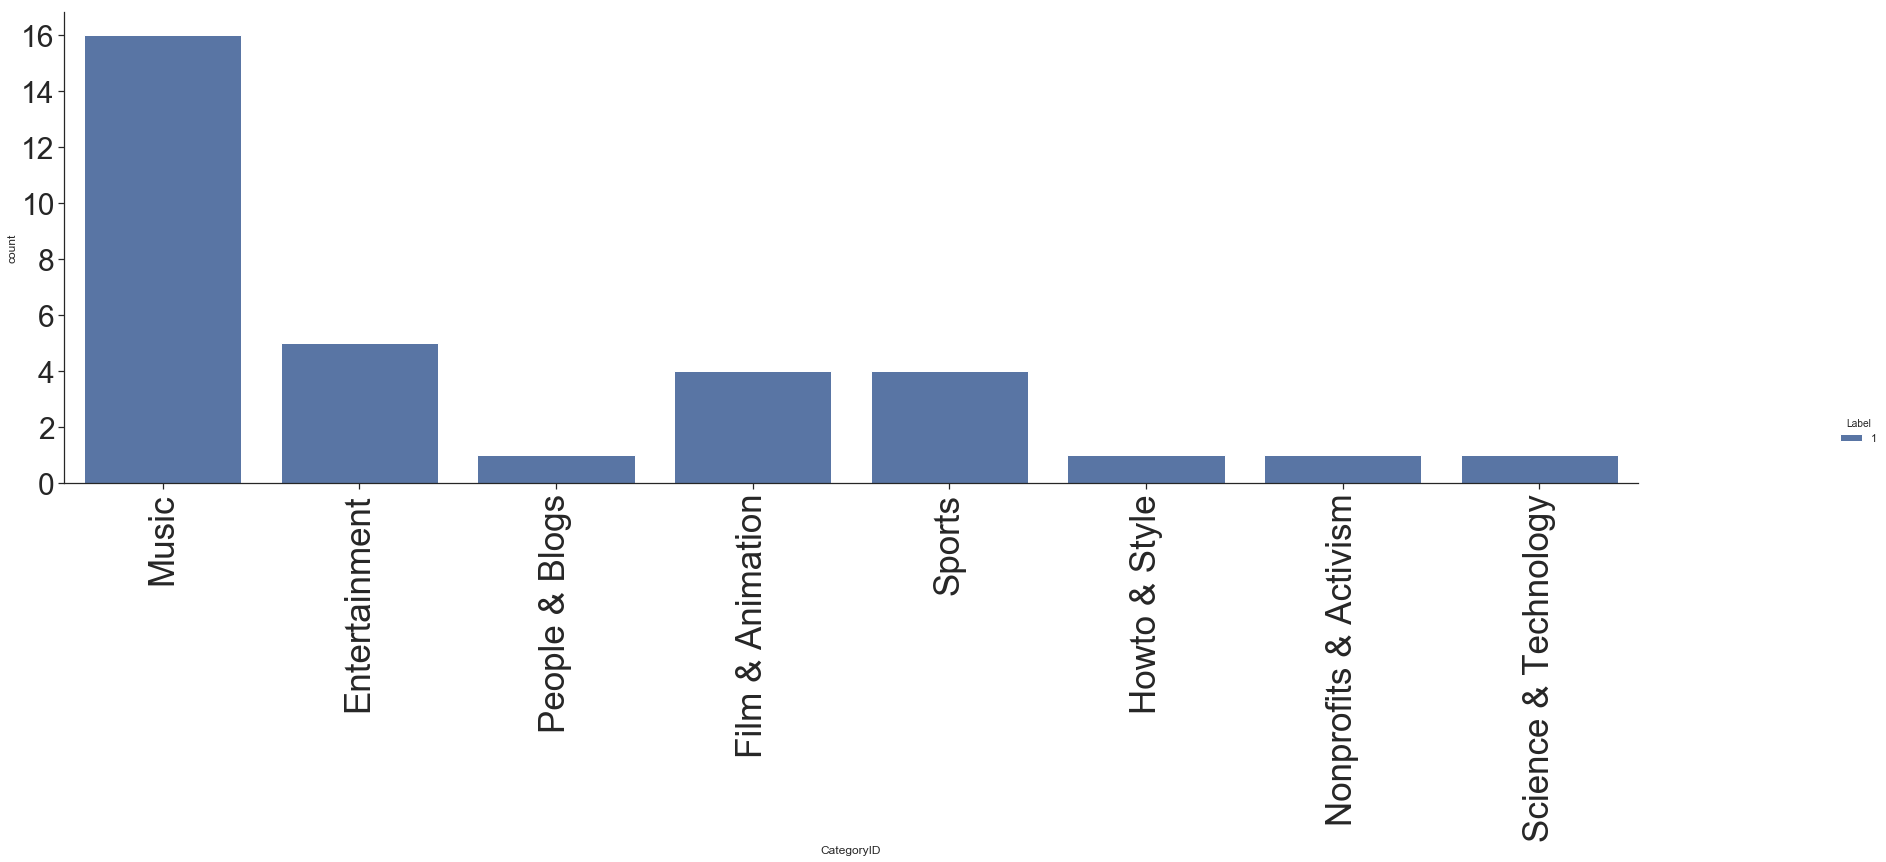

In [347]:
#Category distribution of label 1 videos
_ = sns.catplot(x='CategoryID', kind="count",hue='Label',data=label1data)
_.fig.set_size_inches(28,8)
_.set_xticklabels(size = 35,rotation =90)
_.set_yticklabels(size = 30)


In [292]:
# Popular tags 

In [296]:
#Overall Tag count
tagcount = {}
for tag in plotdata['Tags']:
    for word in tag:
        if word not in tagcount:
            tagcount[word] = 1
        else:
            tagcount[word] += 1

In [329]:
#find each category's tag distribution with label 1
category = [
tagincategory = []
for i in range(len(category)):
    tagincategory.append({})
for i in range(len(label1data)): 
    for c in range(len(category)):
        if label1data.iloc[i]['CategoryID'] ==category[c]:
            for tag in label1data.iloc[i]['tag']:
                if tag not in tagincategory[c]:
                    tagincategory[c][tag] = 1
                else:
                    tagincategory[c][tag] += 1
    
        

            
    

In [332]:
#frequent tag
freqtag = []
for i in range(len(category)):
    freqtag.append({})
for i in range(len(tagincategory)):
    for tag in tagincategory[i]:
        if tagincategory[i][tag] >1:
            freqtag[i][tag] = tagincategory[i][tag]
        
        

In [333]:
freqtag
#insights: tags are almost equaly dis

[{'acoustic': 2,
  'big': 2,
  'cardi b': 2,
  'cover': 2,
  'demi': 2,
  'ed sheeran': 2,
  'edsheeran': 2,
  'live': 2,
  'look alive': 2,
  'lovato': 2,
  'lyrics': 2,
  'machine': 2,
  'official': 3,
  'official video': 4,
  'pop': 6,
  'rap': 2,
  'records': 2,
  'remix': 2,
  'session': 2},
 {'bd wong': 2,
  'bryce dallas howard': 2,
  'chris pratt': 2,
  'colin trevorrow': 2,
  'daniella pineda': 2,
  'dinosaur': 2,
  'fallen kingdom': 2,
  'isla nublar': 2,
  'j.a. bayona': 2,
  'james cromwell': 2,
  'jeff goldblum': 2,
  'jurassic park': 2,
  'jurassic world': 2,
  'justice smith': 2,
  'logan paul': 2,
  'steven spielberg': 2,
  't-rex': 2,
  'ted levine': 2},
 {},
 {'animation': 3,
  'deadpool movie': 2,
  'disney': 3,
  'disney pixar': 2,
  'family movie': 3,
  'first look': 3,
  'incredibles 2': 2,
  'jack jack': 2,
  'mr. incredible': 2,
  'new movie': 3,
  'pixar': 2,
  'pixar movie': 2,
  'sneak peek': 3,
  'teaser': 2,
  'the incredibles': 2,
  'trailer': 4},
 {'bottl

The distribution of tags are really spreaded out and the only tag that appeared more than 5 times is pop. So I think there's no point of visualize as it will just be a word cloud with evenly distributed tags.